In [82]:
import numpy as np 
import pandas as pd 

In [83]:
import matplotlib.pyplot as plt 

In [84]:
import warnings
warnings.filterwarnings('ignore')

In [85]:
csv_path = '../dataset/all_stocks_5yr csv/all_stocks_5yr.csv'
df = pd.read_csv(csv_path)
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [87]:
df.isna().sum() / len(df)

date      0.000000
open      0.000018
high      0.000013
low       0.000013
close     0.000000
volume    0.000000
Name      0.000000
dtype: float64

In [88]:
df['open'] = df['open'].fillna(df['open'].mean())

In [89]:
df['high'] = df['high'].fillna(df['high'].mean())
df['low'] = df['low'].fillna(df['low'].mean())

In [90]:
df.isna().sum() / len(df)

date      0.0
open      0.0
high      0.0
low       0.0
close     0.0
volume    0.0
Name      0.0
dtype: float64

In [91]:
df.describe()

,open,high,low,close,volume
count,619040.000000,619040.000000,619040.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.377904,98.206884,96.506797,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.535375,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [92]:
df.shape

(619040, 7)

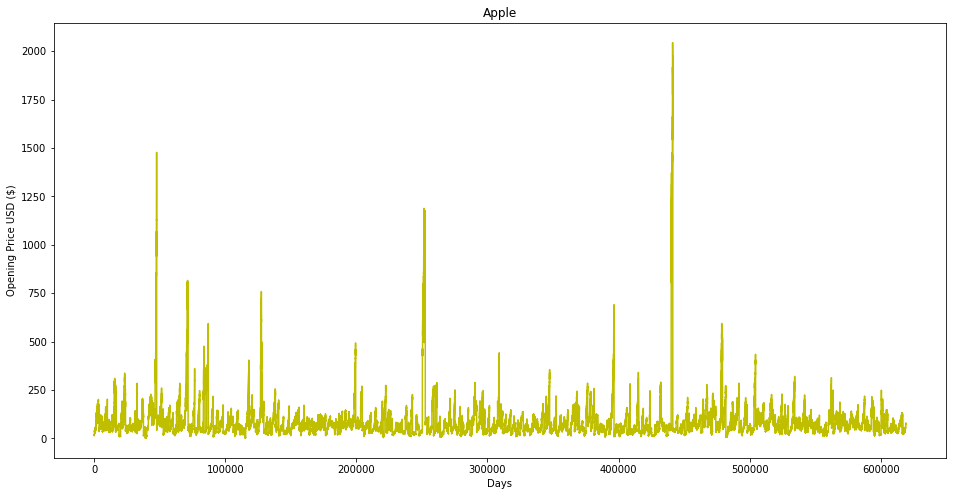

In [93]:
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Opening Price USD ($)')
plt.plot(df['open'], c = 'y')
plt.show()

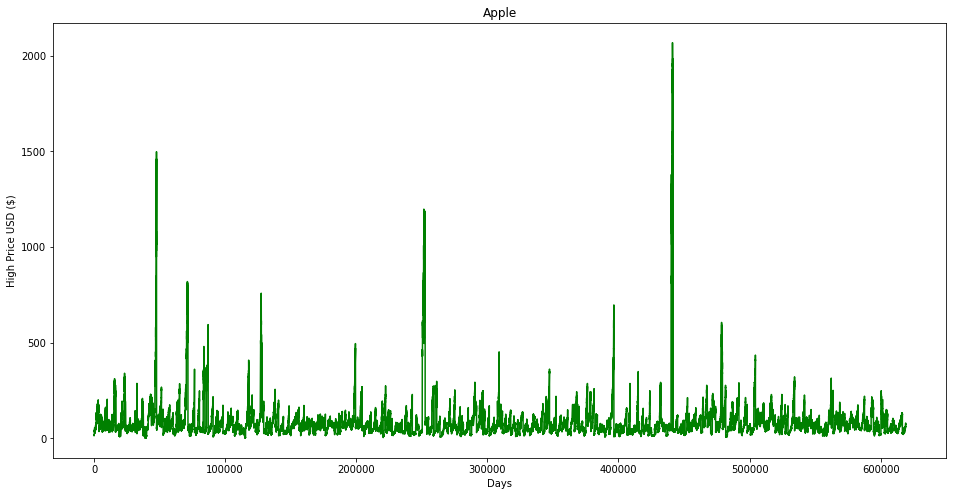

In [94]:
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('High Price USD ($)')
plt.plot(df['high'], c = 'g')
plt.show()

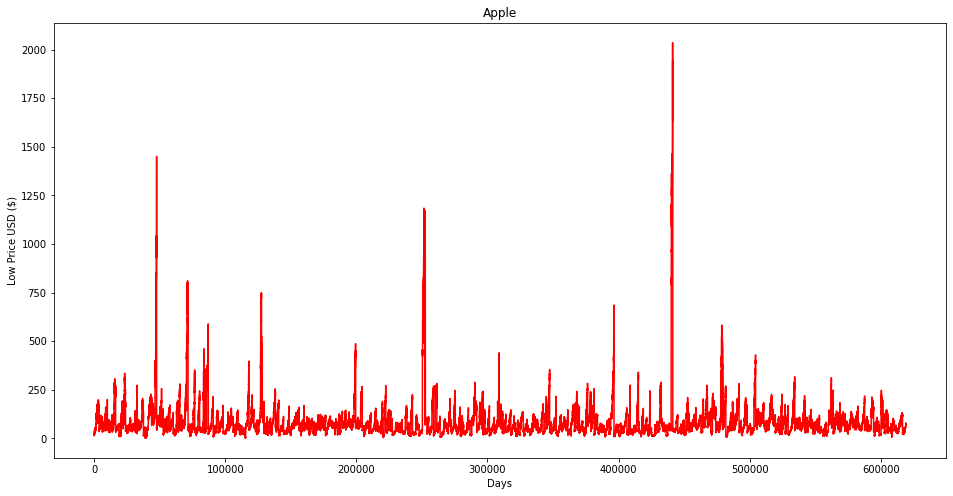

In [95]:
# Visualizing the low prices of the data.
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Low Price USD ($)')
plt.plot(df['low'], c = 'r')
plt.show()

In [96]:
X.head()

,open,high,low,close,Name,year,month,day
0,15.07,15.12,14.63,14.75,AAL,2013,02,08
1,14.89,15.01,14.26,14.46,AAL,2013,02,11
2,14.45,14.51,14.10,14.27,AAL,2013,02,12
3,14.30,14.94,14.25,14.66,AAL,2013,02,13
4,14.94,14.96,13.16,13.99,AAL,2013,02,14


In [97]:
y.head()

0     8407500
1     8882000
2     8126000
3    10259500
4    31879900
Name: volume, dtype: int64

(495232, 6)

In [98]:
df['year'] = df['date'].map(lambda x: x.split('-')[0])
df['year'].head()

0    2013
1    2013
2    2013
3    2013
4    2013
Name: year, dtype: object

In [99]:
df['month'] = df['date'].map(lambda x: x.split('-')[1])
df['month'].head()

0    02
1    02
2    02
3    02
4    02
Name: month, dtype: object

In [100]:
df['day'] = df['date'].map(lambda x: x.split('-')[2])
df['day'].head()

0    08
1    11
2    12
3    13
4    14
Name: day, dtype: object

In [101]:
drop_cols = ['date', 'Name']
df.drop(drop_cols ,axis = 1, inplace = True)

In [103]:
cols = ['open', 'high', 'low', 'close', 'year', 'month', 'day']
X = df[cols]
y = df['volume']

In [104]:
X.head()

,open,high,low,close,year,month,day
0,15.07,15.12,14.63,14.75,2013,02,08
1,14.89,15.01,14.26,14.46,2013,02,11
2,14.45,14.51,14.10,14.27,2013,02,12
3,14.30,14.94,14.25,14.66,2013,02,13
4,14.94,14.96,13.16,13.99,2013,02,14


In [105]:
y.head()

0     8407500
1     8882000
2     8126000
3    10259500
4    31879900
Name: volume, dtype: int64

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [107]:
print(
    'X_train shape and X_test are {0} {1} respectively' 
    'while y_train and y_test shape are {2} {3}'.format(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    )

X_train shape and X_test are (495232, 7) (123808, 7) respectivelywhile y_train and y_test shape are (495232,) (123808,)


array([  1,   1,   1, ..., 504, 504, 504])

0    AAL
1    AAL
2    AAL
3    AAL
4    AAL
Name: Name, dtype: object

In [108]:
from sklearn.linear_model import ARDRegression
ar = ARDRegression()

In [109]:
ar.fit(X_train, y_train)

ARDRegression()

In [110]:
ar.score(X_train, y_train)

0.025395263664285905

In [114]:
prediction = ar.predict(X_train)
prediction

array([6653819.06829656, 4778631.85544959, 4809628.50618681, ...,
       3918863.38439358, 4482178.78176378, 2945796.87730128])

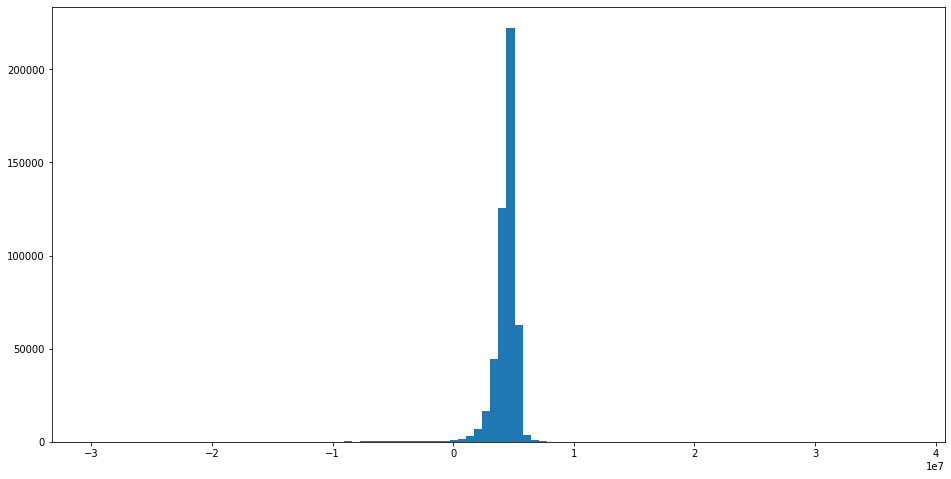

In [119]:
# Visualizing the low prices of the data.
plt.figure(figsize=(16,8))
plt.hist(prediction, bins=100)
plt.show()